In [82]:
import os
import re
import glob
import spacy
import random
import pandas as pd
import matplotlib.pyplot as plt
import nltk 

import gensim
from gensim import corpora, models
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis.gensim
import gensim.corpora as corpora
from gensim.models.wrappers import LdaMallet
from nltk.tokenize import sent_tokenize, word_tokenize

from pprint import pprint



from IPython.display import HTML

import pyLDAvis
pyLDAvis.enable_notebook()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import datetime
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venishpatel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [44]:
each_f = glob.glob(r'C:\Users\venishpatel\Desktop\Venish\*.csv')
df1_from_each_f = (pd.read_csv(f,index_col=0,parse_dates=[0]) for f in each_f)
df  = pd.concat(df1_from_each_f, ignore_index=True)
print(df.shape)


C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DtypeWarning: Columns (15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


(2946207, 20)


In [5]:
df

,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN
5,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th...",Unknown,English,10/1/2017 2:47,10/1/2017 2:47,1050,9644,247,NaN,Right,0,RightTroll,0,905874659358453760,914320835325853696,http://twitter.com/905874659358453760/statuses...,https://twitter.com/FoxNews/status/91423949678...,NaN,NaN
6,10_GOP,🐝🐝🐝 https://t.co/MorL3AQW0z,Unknown,English,10/1/2017 2:48,10/1/2017 2:48,1050,9644,248,RETWEET,Right,1,RightTroll,0,905874659358453760,914321156466933760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/Cernovich/status/914314644...,NaN,NaN
7,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,Unknown,English,10/1/2017 2:52,10/1/2017 2:53,1050,9644,249,NaN,Right,0,RightTroll,0,905874659358453760,914322215537119234,http://twitter.com/905874659358453760/statuses...,NaN,NaN,NaN
8,10_GOP,"As much as I hate promoting CNN article, here ...",Unknown,English,10/1/2017 3:47,10/1/2017 3:47,1050,9646,250,NaN,Right,0,RightTroll,0,905874659358453760,914335818503933957,http://twitter.com/905874659358453760/statuses...,http://www.cnn.com/2017/09/27/us/puerto-rico-a...,NaN,NaN
9,10_GOP,After the 'genocide' remark from San Juan Mayo...,Unknown,English,10/1/2017 3:51,10/1/2017 3:51,1050,9646,251,NaN,Right,0,RightTroll,0,905874659358453760,914336862730375170,http://twitter.com/905874659358453760/statuses...,NaN,NaN,NaN


In [6]:
df['content'].isnull().sum()

1

In [46]:
df.dropna(subset = ['content'], inplace = True)

In [47]:
df_english = df[df['language']=='English']

In [48]:
df_english

,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN
5,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th...",Unknown,English,10/1/2017 2:47,10/1/2017 2:47,1050,9644,247,NaN,Right,0,RightTroll,0,905874659358453760,914320835325853696,http://twitter.com/905874659358453760/statuses...,https://twitter.com/FoxNews/status/91423949678...,NaN,NaN
6,10_GOP,🐝🐝🐝 https://t.co/MorL3AQW0z,Unknown,English,10/1/2017 2:48,10/1/2017 2:48,1050,9644,248,RETWEET,Right,1,RightTroll,0,905874659358453760,914321156466933760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/Cernovich/status/914314644...,NaN,NaN
7,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,Unknown,English,10/1/2017 2:52,10/1/2017 2:53,1050,9644,249,NaN,Right,0,RightTroll,0,905874659358453760,914322215537119234,http://twitter.com/905874659358453760/statuses...,NaN,NaN,NaN
8,10_GOP,"As much as I hate promoting CNN article, here ...",Unknown,English,10/1/2017 3:47,10/1/2017 3:47,1050,9646,250,NaN,Right,0,RightTroll,0,905874659358453760,914335818503933957,http://twitter.com/905874659358453760/statuses...,http://www.cnn.com/2017/09/27/us/puerto-rico-a...,NaN,NaN
9,10_GOP,After the 'genocide' remark from San Juan Mayo...,Unknown,English,10/1/2017 3:51,10/1/2017 3:51,1050,9646,251,NaN,Right,0,RightTroll,0,905874659358453760,914336862730375170,http://twitter.com/905874659358453760/statuses...,NaN,NaN,NaN


In [85]:
#random.seed(927)
tweets = df_en.content

In [86]:
tweets = []


stopwords = nltk.corpus.stopwords.words('english')  
url = re.compile(r'http\S+') 
non_alpha_numer= re.compile('[\W_]+') 
hashtag = re.compile(r'#[^\s$\n]+') 
handle = re.compile(r'@[^\s$\n]+') 
extra_space = re.compile(r' +') 


ponl = spacy.load('en_core_web_sm', disable=['ner'])


def pp(txt):
    
    for tweet in txt:
              
        # remove url, hashtag, handle
        tweets_n = url.sub(' ', tweet)
        tweets_n = hashtag.sub(' ', tweets_n)
        tweets_n = handle.sub(' ', tweets_n)
        
        # lemmatize
        doc = ponl(tweets_n)
        
        # Extracting the lemmatized word for each token
        tweets_n = " ".join([token.lemma_ if token.lemma_ != '-PRON-' else token.lower_ for token in doc])
           
    
        # removing stopwords
        tweets_n = [w for w in new_tweet.split(' ') if w not in stopwords and len(w)>2]
        tweets_n = ' '.join(tweets_n)
    
        # removing other useless stuff
        tweets_n = non_alpha_numer.sub(repl=' ', string=tweets_n)
        tweets_n = extra_space.sub(repl=' ', string=tweets_n)
        
        # removing words with less than 3 characters
        tweets_n = [w for w in tweets_n.split(' ') if len(w)>2]
        tweets_n = ' '.join(tweets_n)

    
        tweets.append(tweets_n)

<>:6: DeprecationWarning: invalid escape sequence \W
<>:6: DeprecationWarning: invalid escape sequence \W
<>:6: DeprecationWarning: invalid escape sequence \W
<ipython-input-86-13bc3646e56e>:6: DeprecationWarning: invalid escape sequence \W
  non_alpha_numer= re.compile('[\W_]+')


In [89]:
pp(tweets)


In [88]:
len(clean_tweets)

2116866

In [33]:
len(clean_tweets)

2116866

In [34]:
df_en['content'] = clean_tweets

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_en.to_csv("cleaned_data.csv")

In [38]:
df_rus = df[df['language']=='Russian']

(-0.5, 2999.5, 1999.5, -0.5)

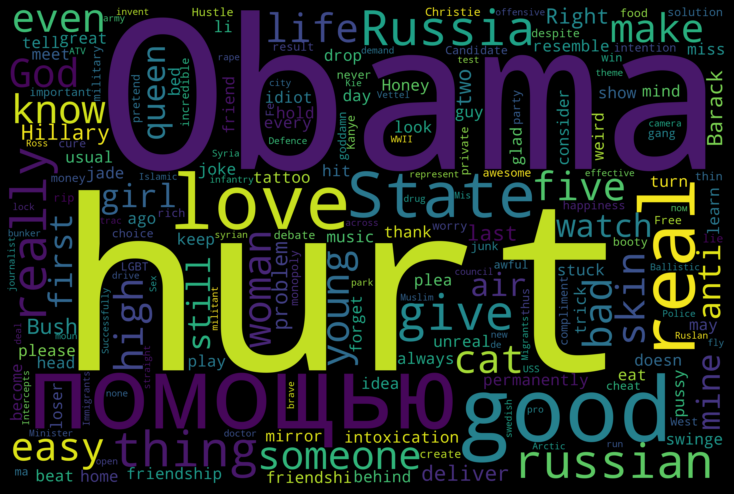

In [78]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df_bef['content']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10,8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [56]:
%%time
df_en['harvested_date'] = pd.to_datetime(df_en['harvested_date'])
df_en['publish_date'] = pd.to_datetime(df_en['publish_date'])

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Wall time: 5min 1s


In [77]:
date_elec = datetime.date(2016,11,8)
df_en['dates'] = df_en['harvested_date'].dt.date 
df_bef = df_en[df_en['dates'] < date_elec]

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2116866

In [72]:
hash_tags = df.content.str.findall(r'#.*?(?=\s|$)')

(-0.5, 2999.5, 1999.5, -0.5)

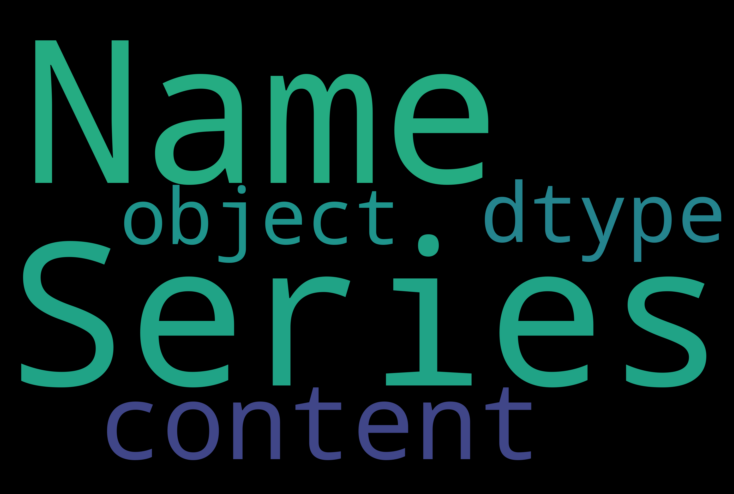

In [73]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(hash_tags))
fig = plt.figure(
    figsize = (10,8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [74]:
df.head()

,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1


In [83]:
txt = df_en.content.apply(word_tokenize)

In [90]:
df

,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1


In [91]:
df_f

NameError: name 'df_f' is not defined

In [93]:
words = ['canada', 'canadian', 'trudeau', 'justintrudeau', 'toronto', 'montreal', 'vancouver', 'ottawa', 'onpoli', 'polqc', 'cdnpoli',
             'canuck', 'thejagmeetsingh', 'jagmeet singh', 'topoli', 'quebec', 'qcpoli',
             'halifax', 'edmonton', 'calgary', 'alberta', 'ontario', 'winnipeg', 'manitoba', 'saskatchewan', 'british columbia']

In [95]:
can_regex = '(' + '|'.join(words) + ')'

df = df[df.content.notna()]
cantwt = df[df.content.str.contains(can_regex, case=False)]

# Drop duplicates just in case
cantwt = cantwt.drop_duplicates(['author', 'content', 'publish_date', 'harvested_date', 'account_type'])
cantwt.shape

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


(0, 20)

In [96]:
cantwt.to_pickle('troll_tweets_canada_pickle')

In [98]:
for word in words:
    print(word, len(cantwt[cantwt.content.str.contains(word, case=False)]))

canada 0
canadian 0
trudeau 0
justintrudeau 0
toronto 0
montreal 0
vancouver 0
ottawa 0
onpoli 0
polqc 0
cdnpoli 0
canuck 0
thejagmeetsingh 0
jagmeet singh 0
topoli 0
quebec 0
qcpoli 0
halifax 0
edmonton 0
calgary 0
alberta 0
ontario 0
winnipeg 0
manitoba 0
saskatchewan 0
british columbia 0
